# Vehicle Detection Project

The goals / steps of this project are the following:

* Perfrom color transform and append binned color features, as well as histograms of color.
* Perform a Histogram of Oriented Gradients (HOG) feature extraction 
* On a labeled training set of images, train a classifier Linear SVM classifier to your features vector. 
* Implement a sliding-window technique and use your trained classifier to search for vehicles in images.
* Run your pipeline on a video stream (start with the test_video.mp4 and later implement on full project_video.mp4) and create a heat map of recurring detections frame by frame to reject outliers and follow detected vehicles.
* Estimate a bounding box for vehicles detected.


First, lets import all required modules:

In [1]:
from imageutils import *
from params import *
import matplotlib.pyplot as plt
from matplotlib import gridspec
from IPython.display import Image
%matplotlib inline

## Color Features:
The first features to obtain from a picture are the histogram distributions by channel:

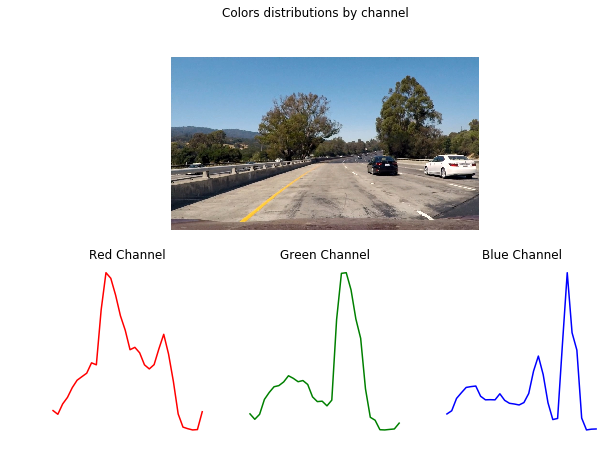

In [3]:
# Load test example:
fname = PATH_TEST + 'test1.jpg'
img = mpimg.imread(fname)

# get color distributions:
feature_colors = color_hist(img, nbins=32, bins_range=(0, 256))

# Create layout distribution:
fig = plt.figure(figsize=(10,7))
gs = gridspec.GridSpec(2, 3)
ax1 = plt.subplot(gs[0, :])
ax1.imshow(img)
ax1.axis('off')
ax2 = plt.subplot(gs[1, 0])
ax2.plot(feature_colors[:32], color='red')
ax2.axis('off')
ax2.set_title('Red Channel')
ax3 = plt.subplot(gs[1, 1])
ax3.plot(feature_colors[32:64], color='green')
ax3.axis('off')
ax3.set_title('Green Channel')
ax4 = plt.subplot(gs[1, 2])
ax4.plot(feature_colors[64:], color='blue')
ax4.axis('off')
ax4.set_title('Blue Channel')
fig.suptitle('Colors distributions by channel', size=12)
fig.savefig(OUTPUT_IMAGES + 'color_distributions.jpg')

plt.show()


In the above representation it is shown the color channels 'RGB' distributions for the image. Of course, one way to create imteresting features from colors would be to work in different color spaces, for example:

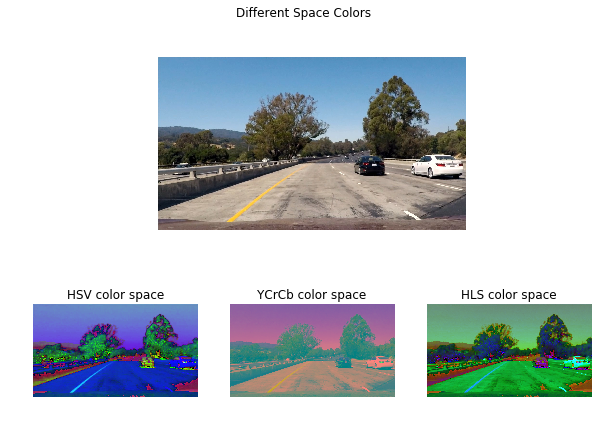

In [6]:
# get different space colors:
_, feature_image1 = bin_spatial(img, color_space='HSV', size=(img.shape[0],img.shape[1]))
_, feature_image2 = bin_spatial(img, color_space='YCrCb', size=(img.shape[0],img.shape[1]))
_, feature_image3 = bin_spatial(img, color_space='HLS', size=(img.shape[0],img.shape[1]))

# Create layout distribution:
fig = plt.figure(figsize=(10,7))
gs = gridspec.GridSpec(2, 3)
ax1 = plt.subplot(gs[0, :])
ax1.imshow(img)
ax1.axis('off')
ax2 = plt.subplot(gs[1, 0])
ax2.imshow(feature_image1)
ax2.axis('off')
ax2.set_title('HSV color space')
ax3 = plt.subplot(gs[1, 1])
ax3.imshow(feature_image2)
ax3.axis('off')
ax3.set_title('YCrCb color space')
ax4 = plt.subplot(gs[1, 2])
ax4.imshow(feature_image3)
ax4.axis('off')
ax4.set_title('HLS color space')
fig.suptitle('Different Space Colors', size=12)
fig.savefig(OUTPUT_IMAGES + 'spacecolor_distributions.jpg')

plt.show()

Finally, color gradients transformations will help to generate new features:

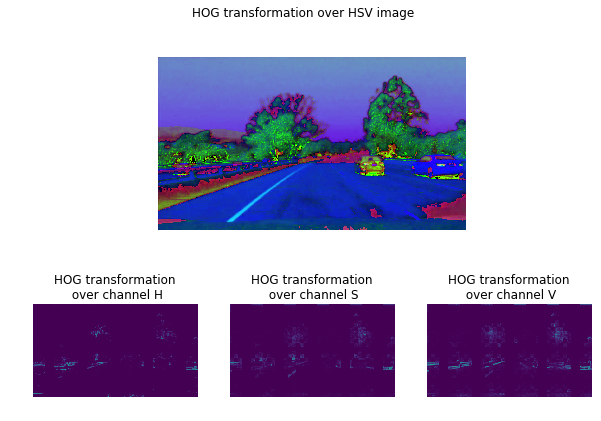

In [7]:
# get different space colors:

_, feature_image11 = get_hog_features(feature_image1[:, :, 0], ORIENT, PIX_PER_CELL, CELL_PER_BLOCK, vis=True, feature_vec=True)
_, feature_image22 = get_hog_features(feature_image1[:, :, 1], ORIENT, PIX_PER_CELL, CELL_PER_BLOCK, vis=True, feature_vec=True)
_, feature_image33 = get_hog_features(feature_image1[:, :, 2], ORIENT, PIX_PER_CELL, CELL_PER_BLOCK, vis=True, feature_vec=True)


# Create layout distribution:
fig = plt.figure(figsize=(10,7))
gs = gridspec.GridSpec(2, 3)
ax1 = plt.subplot(gs[0, :])
ax1.imshow(feature_image1)
ax1.axis('off')
ax2 = plt.subplot(gs[1, 0])
ax2.imshow(feature_image11)
ax2.axis('off')
ax2.set_title('HOG transformation\n over channel H')
ax3 = plt.subplot(gs[1, 1])
ax3.imshow(feature_image22)
ax3.axis('off')
ax3.set_title('HOG transformation\n over channel S')
ax4 = plt.subplot(gs[1, 2])
ax4.imshow(feature_image33)
ax4.axis('off')
ax4.set_title('HOG transformation\n over channel V')
fig.suptitle('HOG transformation over HSV image', size=12)
fig.savefig(OUTPUT_IMAGES + 'hog_transformation.jpg')

plt.show()

All these transformations are included in a single function: ```single_img_features``` that performs all defined transformations and generates features used 

# Model Selection:
Now, there are features based in colors and gradients to be used to diferenciate car and no-car images:

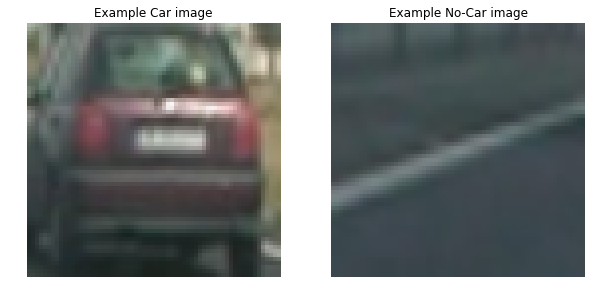

In [11]:
# Load test example:
fcar = 'dataset/vehicles/GTI_Right/image0146.png'
img_car = mpimg.imread(fcar)

fnocar = 'dataset/non-vehicles/GTI/image1032.png'
img_nocar = mpimg.imread(fnocar)

# Create layout distribution:
fig = plt.figure(figsize=(10,7))
gs = gridspec.GridSpec(1, 2)
ax1 = plt.subplot(gs[0, 0])
ax1.imshow(img_car)
ax1.set_title('Example Car image')
ax1.axis('off')
ax2 = plt.subplot(gs[0, 1])
ax2.imshow(img_nocar)
ax2.set_title('Example No-Car image')
ax2.axis('off')
fig.savefig(OUTPUT_IMAGES + 'car_nocar_transformation.jpg')

plt.show()

A dataset, with car(8500 examples) and no-car(8700 examples) images as shown above is used to train a ```LinearSVM``` model. The function used to extract features from the images is ```extract_feats_dataset()```. Once features are generated, ```create_sets()``` function is used to generate train/test and validation sets. Since the dataset include sequences of images, a standard function like ```train_test_split``` is not used since it implements shuffling. In order to train different model optimizations, ```run_models()``` is used to identify the most suitable model.

Since this model requires scaled features, a scaler is used. Also, to reduce the number of features and just use those important, ```SelectPercentile``` is used for feature selection:

In [2]:
feats, sizes_sources = extract_feats_dataset()
print(sizes_sources)

feat_train, label_train, feat_test, label_test, feat_val, label_val = create_sets(feats, sizes_sources,
                                                                                   split=[0.7, 0.2, 0.1])

run_models(feat_train, label_train, feat_test, label_test)

{'vehicles': {'GTI_Left': 909, 'GTI_Right': 664, 'GTI_Far': 834, 'KITTI_extracted': 5966, 'GTI_MiddleClose': 419}, 'non-vehicles': {'GTI': 3900, 'Extras': 5068}}
Results for Percentile: 10, C: 1, tol: 0.001:
             precision    recall  f1-score   support

    non-car       0.95      0.97      0.96      1793
        car       0.96      0.95      0.96      1759

avg / total       0.96      0.96      0.96      3552

Results for Percentile: 10, C: 1, tol: 1e-05:
             precision    recall  f1-score   support

    non-car       0.95      0.97      0.96      1793
        car       0.96      0.95      0.96      1759

avg / total       0.96      0.96      0.96      3552

Results for Percentile: 10, C: 1, tol: 0.0001:
             precision    recall  f1-score   support

    non-car       0.95      0.97      0.96      1793
        car       0.96      0.95      0.96      1759

avg / total       0.96      0.96      0.96      3552

Results for Percentile: 10, C: 10, tol: 0.001:
       

Different model optimizations are tested, as we can see in the table below, similar results in terms of model performance are reached, for such reason, the model final model selected is the less computational expensive:
```
Pipeline(steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('selection', SelectPercentile(percentile=10,
         score_func=<function f_classif at 0x7f01bb99f510>)), ('clf', LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=42, tol=0.001,
     verbose=0))])
```
|Percentile|C  |tol|F1|
|:--------:|:-:|:-:|:-:|
|10|1|1e-3|0.96|
|10|1|1e-4|0.96|
|10|10|1e-3|0.96|
|10|10|1e-4|0.96|
|40|1|1e-3|0.96|
|40|1|1e-4|0.96|
|40|10|1e-3|0.96|
|40|10|1e-4|0.96|
|70|1|1e-3|0.96|
|70|1|1e-4|0.96|
|70|10|1e-3|0.96|
|70|10|1e-4|0.96|

As we can see in the graph above, model reaches great results even with little training samples. F1 score for test set is ~1. 
As a reminder, F1 is the harmonic mean of Precision (fraction of car/non-car predictions that are right) and Recall (fraction of car/non-car images identified).

Same method is applied to identify the optimal feature combination:

|SPATIAL_FEAT|HIST_FEAT|HOG_FEAT|F1|
|:--------:|:-:|:-:|:-:|
|True|True|True|0.96|
|False|True|True|0.94|
|True|False|True|0.93|
|True|True|False|0.91|

As we can see, using all features maximizes classifier's performance.

With regards to the HOG parameters, different parametrizations were tested, but not significant differences in model performace were found. Final HOG parameters were selected while testing final output's model performance and the number of false positives detected.


We can now use this classifier to identify cars in any image:

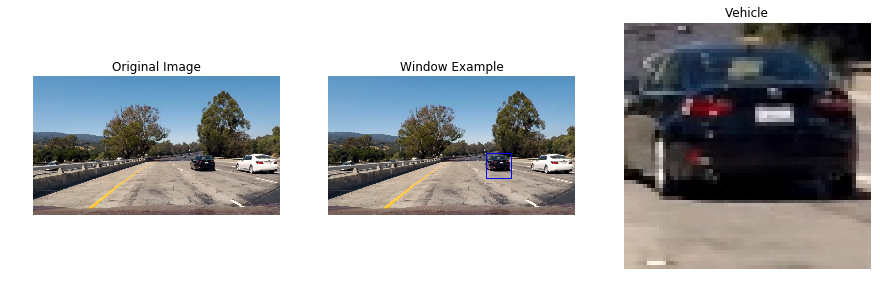

In [3]:
# Load test example:
fname = PATH_TEST + 'test1.jpg'
img = mpimg.imread(fname)

# get list of windows:
window = ((820, 400), (950, 530))
img_1 = draw_boxes(img, [window], color=(0, 0, 255), thick=6)

test_img = cv2.resize(img[window[0][1]:window[1][1], window[0][0]:window[1][0]], (64, 64))

test_features = single_img_features(test_img, spatial_feat=True, hist_feat=True, hog_feat=True)

#5) Predict using your classifier
# Load the classifier:
clf = pickle.load(open(DATASET_PATH + "estimator.p", "rb"))
prediction = clf.predict(test_features.reshape(1, -1))

# Create layout distribution:
fig = plt.figure(figsize=(15,7))
gs = gridspec.GridSpec(1, 3)
ax1 = plt.subplot(gs[0, 0])
ax1.imshow(img)
ax1.set_title('Original Image')
ax1.axis('off')
ax2 = plt.subplot(gs[0, 1])
ax2.imshow(img_1)
ax2.axis('off')
ax2.set_title('Window Example')
ax3 = plt.subplot(gs[0, 2])
ax3.imshow(test_img)
ax3.axis('off')
ax3.set_title('Vehicle')
fig.savefig(OUTPUT_IMAGES + 'forecast_example.jpg')

plt.show()

# Sliding Window:
It is time to implement a sliding window that allows a search over an image to identify cars. This step is particularly tricky since cars are presented at different sizes. First step is to use function ```slide_window``` to create windows, over the area of interest only, in an image and ```draw_boxes``` to plot them in the image.
To avoid false positives of cars in the opositive direction, ```x_start_stop=[300, None]```.

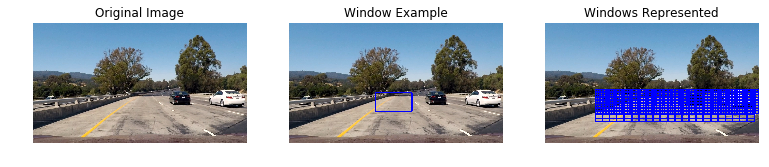

In [3]:
# Load test example:
fname = PATH_TEST + 'test1.jpg'
img = mpimg.imread(fname)


# get list of windows:
windows = slide_window(img, x_start_stop=[300, None], y_start_stop=[400, 600],
                     xy_window=(220, 110), xy_overlap=(0.8, 0.8))
windows.extend(slide_window(img, x_start_stop=[300, None], y_start_stop=[400, 500],
                     xy_window=(96, 96), xy_overlap=(0.75, 0.75)))
windows.extend(slide_window(img, x_start_stop=[300, None], y_start_stop=[400, 550],
                     xy_window=(64, 64), xy_overlap=(0.75, 0.75)))


img_1 = draw_boxes(img, [windows[23]], color=(0, 0, 255), thick=6)

img_w = draw_boxes(img, windows, color=(0, 0, 255), thick=6)


# Create layout distribution:
fig = plt.figure(figsize=(13,7))
gs = gridspec.GridSpec(1, 3)
ax1 = plt.subplot(gs[0, 0])
ax1.imshow(img)
ax1.set_title('Original Image')
ax1.axis('off')
ax2 = plt.subplot(gs[0, 1])
ax2.imshow(img_1)
ax2.axis('off')
ax2.set_title('Window Example')
ax3 = plt.subplot(gs[0, 2])
ax3.imshow(img_w)
ax3.axis('off')
ax3.set_title('Windows Represented')
fig.savefig(OUTPUT_IMAGES + 'sliding_windows.jpg')

plt.show()

Next step is to identify just those windows over which the trained model predicts a **Car**. 

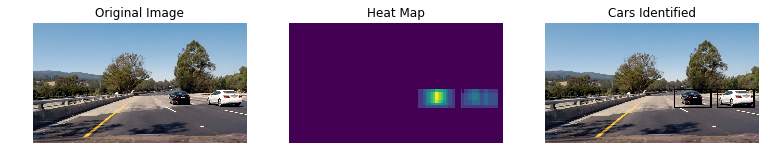

In [8]:
# Load image:
fname = PATH_TEST + 'test4.jpg'
img = mpimg.imread(fname)
img = img.astype(np.float32) / 255.

# Load the classifier:
clf = pickle.load(open(DATASET_PATH + "estimator.p", "rb"))

hot_windows = search_windows(img, windows, clf) 

# Add heat to each box in box list
heat = np.zeros_like(img[:,:,0]).astype(np.float)
heat = add_heat(heat,hot_windows)
    
# Apply threshold to help remove false positives
heat = apply_threshold(heat,1)

# Visualize the heatmap when displaying    
heatmap = np.clip(heat, 0, 255)

# Find final boxes from heatmap using label function
labels = label(heatmap)
draw_img = draw_labeled_bboxes(np.copy(img), labels)

# Create layout distribution:
fig = plt.figure(figsize=(13,7))
gs = gridspec.GridSpec(1, 3)
ax1 = plt.subplot(gs[0, 0])
ax1.imshow(img)
ax1.set_title('Original Image')
ax1.axis('off')
ax2 = plt.subplot(gs[0, 1])
ax2.imshow(heatmap)
ax2.axis('off')
ax2.set_title('Heat Map')
ax3 = plt.subplot(gs[0, 2])
ax3.imshow(draw_img)
ax3.axis('off')
ax3.set_title('Cars Identified')
fig.savefig(OUTPUT_IMAGES + 'cars_identified.jpg')

plt.show()

## Final Video
For the final video, the python class ```BoundingBoxes``` is used to collect the bounding boxes with positives of the last ```n``` frames to identify cars. This allows a significant reduction in the number of False Positives as well as a more robust cart detection classifier.

For the final video, after several tests with different Hog parameters, this is the parameter configuration that maximized classifier's performance and minimized the number of false positives in the final video:
```
# HOG Parameters
PIX_PER_CELL = 8
CELL_PER_BLOCK = 2
ORIENT = 9
HOG_CHANNEL = 0

# COLOR parameters:
COLOR_SPACE = 'YCrCb'
SPATIAL_SIZE = (16, 16)
HIST_BINS = 32
HIST_RANGE = (0, 256)

# Transformations:
SPATIAL_FEAT = True
HIST_FEAT = True
HOG_FEAT = True

# CLF:
PROB_THRESHOLD = 0.7 # Classifier Class probability

# HEATMAP threshold:
THRESHOLD = 30   # Minimum threshold used to flag a window as positive
```

Final result is available in [Youtube](https://youtu.be/5uYcCD5XF4E)

# Reflection:
The pipeline still detects a few false positives. To improve the model, I will have to work more on the training data to distinguish cars from non car objects more confidently. Since the dataset includes sequences and repeated images, a cross validation method with shuffling + tuning with GridCV couldn't be performed. Final model's performance wasn't significantly affected by different parameter configurations, this is suspicios and make me consider the model is somehow overfitted. A deeper understanding of the dataset and how images are presented should be required.

As said, different configurations of the HOG parameters didn't affect much to the classifier's performance while had significant impact on the final video. Final parameters used where selected after several try&test with the final video.